In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Navegación Robot

- 0: ADELANTE
- 1: GIRAR A LA DERECHA
- 2: GIRAR A LA IZQUIERDA

## Local instalation (option 1)

Install the following Python packages to run this notebook

`pip install pip -U`

`pip install tensorflow jupyter`

### How install extra packages
Google Colab installs a series of basic packages if we need any additional package just install it.

In [ ]:
!pip install -q keras sklearn

## Import packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import collections

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator


#from sklearn.utils import class_weight
#from sklearn.model_selection import KFold, StratifiedKFold
#import warnings
#warnings.filterwarnings('ignore')

## Define global constants

Lets start with a few epochs to test learning network parameters

In [ ]:
batch_size = 32
nb_classes = 3
epochs = 15


## Build LeNet5 structure

<center><img src="https://www.dlsi.ua.es/~juanra/UA/curso_verano_DL/images/LeNet5.jpg"></center>

Building the model:

**Modelo inicial:**

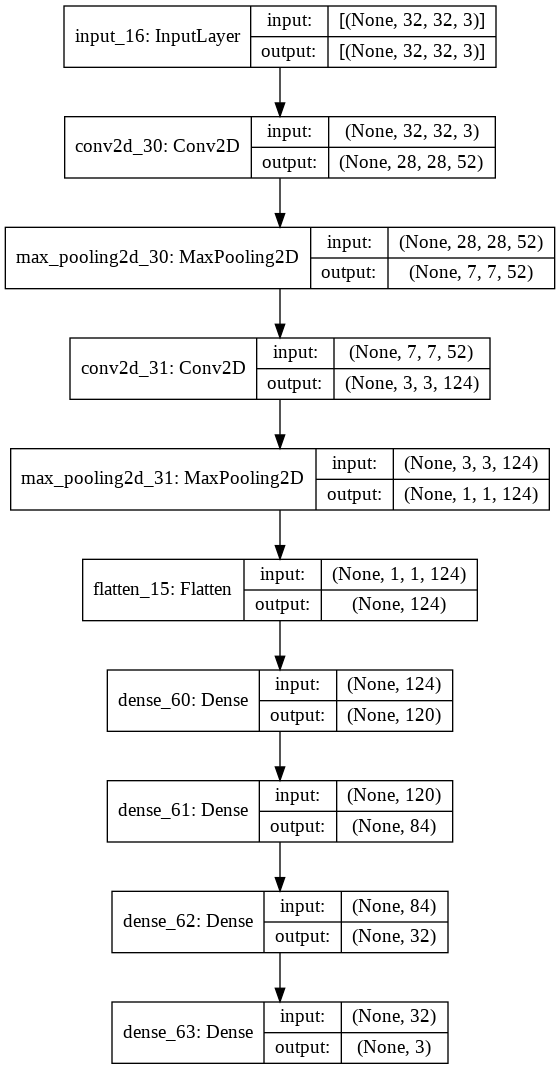

In [ ]:
#Mejor hasta el momento: relu
activation = "relu"


def cnn_model():
    #
    # Neural Network Structure
    #
    
    input_shape = (32, 32, 3)

    inputs = keras.Input(shape=input_shape)
    
    x = layers.Conv2D(52, (5, 5), activation=activation)(inputs)
    x = layers.MaxPooling2D(pool_size=(4, 4))(x)

    x = layers.Conv2D(124, (5, 5), activation=activation)(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = layers.Flatten()(x)

    x = layers.Dense(120, activation=activation)(x)
    x = layers.Dense(84, activation=activation)(x)
    x = layers.Dense(32, activation=activation)(x)
    

    outputs = layers.Dense(nb_classes, activation='softmax')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)

    return model

model = cnn_model()
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

## Start to run the program

Métricas:

In [ ]:

# Definimos el datagen
datagen = ImageDataGenerator(
  rescale=1./255,
  validation_split=0.1
)

# Le cargamos el dataset de imágenes
inputs = datagen.flow_from_directory(
    "/content/drive/MyDrive/datasets/navegacion_var",
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode="categorical"
)


Found 1152 images belonging to 3 classes.


In [ ]:
model = cnn_model()

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='accuracy', patience=4)

#Entrenamos el modelo
model.fit(inputs, epochs=epochs, batch_size=batch_size , verbose=2, callbacks=early_stopping)
  
print(model.summary())

Epoch 1/15
36/36 - 9s - loss: 1.0695 - accuracy: 0.3854
Epoch 2/15
36/36 - 8s - loss: 0.9141 - accuracy: 0.5347
Epoch 3/15
36/36 - 8s - loss: 0.8155 - accuracy: 0.6024
Epoch 4/15
36/36 - 8s - loss: 0.7551 - accuracy: 0.6606
Epoch 5/15
36/36 - 8s - loss: 0.7013 - accuracy: 0.7005
Epoch 6/15
36/36 - 8s - loss: 0.6491 - accuracy: 0.7283
Epoch 7/15
36/36 - 8s - loss: 0.5977 - accuracy: 0.7552
Epoch 8/15
36/36 - 8s - loss: 0.5367 - accuracy: 0.7804
Epoch 9/15
36/36 - 8s - loss: 0.4850 - accuracy: 0.8056
Epoch 10/15
36/36 - 8s - loss: 0.4287 - accuracy: 0.8333
Epoch 11/15
36/36 - 8s - loss: 0.3713 - accuracy: 0.8620
Epoch 12/15
36/36 - 8s - loss: 0.3287 - accuracy: 0.8802
Epoch 13/15
36/36 - 8s - loss: 0.3070 - accuracy: 0.8828
Epoch 14/15
36/36 - 8s - loss: 0.2939 - accuracy: 0.8906
Epoch 15/15
36/36 - 8s - loss: 0.2547 - accuracy: 0.9028
Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inpu

#Guardar red

In [ ]:
'''
import json
json_config = model.to_json()
with open('modelo.json', 'w') as f:
    json.dump(json_config, f)
'''

model.save('./modelo/modelo.h5')
model.save_weights('./modelo/pesos.h5')


In [ ]:
def predict(file):
  x = load_img(file, target_size=(32, 32))
  x = img_to_array(x)
  x = np.expand_dims(x, axis=0)
  array = model.predict(x)
  result = array[0]
  answer = np.argmax(result)
  if answer == 0:
    print("pred: Adelante")
  #elif answer == 1:
    #print("pred: Atrás")
  elif answer == 1:
    print("pred: Derecha")
  elif answer == 2:
    print("pred: Izquierda")
  return answer

print("Adelante:")
for i in range(15):
  if(i<10): 
    predict("/content/drive/MyDrive/datasets/navegacion_var/adelante/adelante000"+str(i)+".jpg")
  else:
    predict("/content/drive/MyDrive/datasets/navegacion_var/adelante/adelante00"+str(i)+".jpg")

print()
print("Derecha:")
for i in range(15):
  if(i<10):
    predict("/content/drive/MyDrive/datasets/navegacion_var/derecha/derecha000"+str(i)+".jpg")
  else:
    predict("/content/drive/MyDrive/datasets/navegacion_var/derecha/derecha00"+str(i)+".jpg")

print()
print("Izquierda:")
for i in range(15):
  if(i<10):
    predict("/content/drive/MyDrive/datasets/navegacion_var/izquierda/izquierda000"+str(i)+".jpg")
  else:
    predict("/content/drive/MyDrive/datasets/navegacion_var/izquierda/izquierda00"+str(i)+".jpg")




Adelante:
pred: Adelante
pred: Adelante
pred: Adelante
pred: Adelante
pred: Adelante
pred: Adelante
pred: Adelante
pred: Adelante
pred: Adelante
pred: Adelante
pred: Adelante
pred: Adelante
pred: Adelante
pred: Adelante
pred: Adelante

Derecha:
pred: Adelante
pred: Derecha
pred: Derecha
pred: Derecha
pred: Derecha
pred: Derecha
pred: Derecha
pred: Derecha
pred: Derecha
pred: Derecha
pred: Derecha
pred: Adelante
pred: Derecha
pred: Derecha
pred: Derecha

Izquierda:
pred: Izquierda
pred: Izquierda
pred: Izquierda
pred: Adelante
pred: Izquierda
pred: Izquierda
pred: Izquierda
pred: Izquierda
pred: Izquierda
pred: Izquierda
pred: Izquierda
pred: Izquierda
pred: Izquierda
pred: Adelante
pred: Izquierda
